# Módulo 8. Aprendizaje no supervisado

¡Bienvenidos al octavo módulo! Durante todo el curso, hemos trabajado con metodologías basadas en aprendizaje supervisado. En el proceso de entrenamiento, le introduciamos a la red la verdad absoluta (GT) para que intente reducir en lo máximo posible el error obtenido mediante el conocido Gradient Descent. Sin embargo, existen otras metodologías que trabajan de otra forma y que no necesitan una etiqueta para su aprendizaje. El objetivo de esta sesión es que conozcamos y nos familiarizaremos con algunas de las más conocidas y sus tareas asociadas.

## **1. ¿Qué es el aprendizaje no supervisado?**

Los algoritmos de machine y deep learning son frecuentemente clasificados en dos categorías: aprendizaje supervisado y aprendizaje no supervisado. La diferencia entre estas categorías depende del tipo de datos con el que estemos lidiando: el aprendizaje supervisado lidia con datos etiquetados (la etiqueta es lo que estamos intentando predecir) mientras que el aprendiza no supervisado lidia con datos no etiquetados.

Para ilustrar las distinciones entre aprendizaje supervisado y no supervisado, tomemos el ejemplo de las imágenes. El aprendizaje supervisado se ocupa del caso en el que tenemos las imágenes y las etiquetas de lo que está contenido en la imagen (por ejemplo, gato). El aprendizaje no supervisado se ocupa del caso en el que solo tenemos las imágenes.


<center> <img src="https://i.ibb.co/02W8cSb/aprendizaje-no-supervisado.png" border="0"> </center> </a>

**¿Por qué utilizar aprendizaje no supervisado?**


* Mucho más datos sin etiquetar que etiquetados:
    1.   Grandes datos --> mejores modelos
    2.   Lo ideal es no pagar por anotaciones
    3. Descubrir la estructura de los datos: ¿Cuáles son las características importantes en el conjunto de datos?



## **2. Autoencoders**
Los autoencoders son una técnica de aprendizaje no supervisada en la que aprovechamos las redes neuronales para la tarea de aprendizaje de representación. Específicamente, el objetivo es diseñar una arquitectura de red neuronal tal que impongamos un cuello de botella (bottleneck) en la red que obligue a generar una representación comprimida, con una dimension menor de la entrada original. Por lo tanto, el autoencoder, internamente comprime los datos de entrada en un espacio latente y posteriormente, reconstruye los datos de entrada de ese espacio latente. Idealmente, el output del autoencoder debe ser idéntico a la entrada.

Por lo general, un algoritmo basado en autoencoder tiene dos componentes o subredes:



*   **Codificador (Encoder)**: acepta los datos de entrada y los comprime en el espacio latente. Si denotamos nuestros datos de entrada como x y el codificador como E, entonces la representación del espacio latente de salida, s, sería s=(x).
*   **Decodificador (Decoder)**: El decodificador es responsable de aceptar las representaciones de espacio latente y luego reconstruir la entrada original. Si denotamos la función del decodificador como D y la salida del detector como o, entonces podemos representar el decodificador como o = D(s).


<center> <a href="https://ibb.co/hWqjG7"><img src="https://i.ibb.co/kDn442m/autoencoder.png" alt="IA engloba ML, que a su vez engloba DL" border="0"> </center> </a>


Durante el proceso de entrenamiento, el objetivo de un autoencoder es entrenar una red que pueda aprender a reconstruir nuestros datos de entrada. Por tanto, la función de pérdidas que se suele utilizar en este caso es el MSE, donde comparamos los datos de entrada con los datos generados. El objetivo es que el error generado sea el mínimo posible. El verdadero valor del codificador automático vive dentro de esa **representación de espacio latente**. Tened en cuenta que los codificadores automáticos comprimen nuestros datos de entrada y, más concretamente, cuando entrenamos codificadores automáticos, lo que realmente nos importa es el codificador, E, y la representación del espacio latente, s = E(x).

El decodificador, o = D(s), se usa para entrenar el codificador automático de extremo a extremo, pero en aplicaciones prácticas, a menudo (pero no siempre) nos preocupamos más por el codificador y el espacio latente.

Y bien, ¿para qué  se utilizan los autoencoder?

Las aplicaciones más típicas son las siguientes:


*   **Reducción de dimensionalidad** (es decir, como una PCA pero más potente/inteligente).
*   **Eliminación de ruido** (p. ej., eliminación de ruido y preprocesamiento de imágenes para mejorar la precisión de OCR).

* **Detección de anomalías/valores atípicos** (p. ej., detectar puntos de datos mal etiquetados en un conjunto de datos o detectar cuándo un punto de datos de entrada se encuentra fuera de nuestra distribución típica de datos).


Fuera del campo de computer vision, se utilizarán codificadores automáticos aplicados al procesamiento del lenguaje natural (NLP) y problemas de comprensión de texto, incluida la comprensión del significado semántico de las palabras, la construcción de incrustaciones de palabras e incluso el resumen de texto.

Ahora que conocemos un poco más como funcionan los autoencoder vamos a ponernos a trabajar!!!

##2.1 Reducción de la dimensionalidad ##

Vamos a empezar entrenando un codificador automático en el conjunto de datos MNIST. Como ya conocéis de los modelos anteriores, el conjunto de datos MNIST consta de dígitos de 28 × 28 píxeles con un solo canal, lo que implica que cada dígito está representado por 28 x 28 = 784 valores. El codificador automático que vamos adesarrollar hoy  podrá comprimir esos dígitos en un vector de solo 16 valores, ¡esa es una reducción de casi el 98%!

In [1]:
# Importamos los paquetes necesarios
from tensorflow.keras.layers import BatchNormalization, Conv2D, Conv2DTranspose, LeakyReLU, Activation, Flatten, Dense
from tensorflow.keras.layers import Reshape, Input
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2

In [2]:
# Construimos la clase donde alberageremos la estructura de autoencoder convolucional
class ConvAutoencoder:
	@staticmethod
	def build(width, height, depth, filters=(32, 64), latentDim=16):
		# initialize the input shape to be "channels last" along with
		# the channels dimension itself
		# channels dimension itself
		inputShape = (height, width, depth)
		chanDim = -1

    # define the input to the encoder
		inputs = Input(shape=inputShape)
		x = inputs

		# loop over the number of filters
		for f in filters:
			# apply a CONV => RELU => BN operation
			x = Conv2D(f, (3, 3), strides=2, padding="same")(x)
			x = LeakyReLU(alpha=0.2)(x)
			x = BatchNormalization(axis=chanDim)(x)

		# flatten the network and then construct our latent vector
		volumeSize = K.int_shape(x)
		x = Flatten()(x)
		latent = Dense(latentDim)(x)

		# build the encoder model
		encoder = Model(inputs, latent, name="encoder")

  	# start building the decoder model which will accept the
		# output of the encoder as its inputs
		latentInputs = Input(shape=(latentDim,))
		x = Dense(np.prod(volumeSize[1:]))(latentInputs)
		x = Reshape((volumeSize[1], volumeSize[2], volumeSize[3]))(x)

		# loop over our number of filters again, but this time in
		# reverse order
		for f in filters[::-1]:
			# apply a CONV_TRANSPOSE => RELU => BN operation
			x = Conv2DTranspose(f, (3, 3), strides=2,
				padding="same")(x)
			x = LeakyReLU(alpha=0.2)(x)
			x = BatchNormalization(axis=chanDim)(x)
   	# apply a single CONV_TRANSPOSE layer used to recover the
		# original depth of the image
		x = Conv2DTranspose(depth, (3, 3), padding="same")(x)
		outputs = Activation("sigmoid")(x)

		# build the decoder model
		decoder = Model(latentInputs, outputs, name="decoder")

		# our autoencoder is the encoder + decoder
		autoencoder = Model(inputs, decoder(encoder(inputs)),
			name="autoencoder")
		# return a 3-tuple of the encoder, decoder, and autoencoder
		return (encoder, decoder, autoencoder)

In [3]:
# Cargamos la base de datos de MNIST
print("[INFO] loading MNIST dataset...")
((trainX, _), (testX, _)) = mnist.load_data()
# Añadimos la dimensión relativa al canal y normalizamos las imágenes
trainX = np.expand_dims(trainX, axis=-1)
testX = np.expand_dims(testX, axis=-1)
trainX = trainX.astype("float32") / 255.0
testX = testX.astype("float32") / 255.0

[INFO] loading MNIST dataset...
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
# Inicializamos el número de épocas y bs
EPOCHS = 25
BS = 32

from tensorflow.keras.callbacks import EarlyStopping
#Entrenamos nuestra red Autoencoder convolucional
print("[INFO] building autoencoder...")
(encoder, decoder, autoencoder) = ConvAutoencoder.build(width=28, height=28, depth=1, latentDim=32)
opt = Adam(learning_rate=1e-3)
autoencoder.compile(loss="mse", optimizer=opt)
# train the convolutional autoencoder
H = autoencoder.fit(
	trainX, trainX,
	validation_data=(testX, testX),
	epochs=EPOCHS,
	batch_size=BS,
	callbacks=[EarlyStopping(monitor='loss', patience=3, min_delta=0.0005)])


[INFO] building autoencoder...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - loss: 0.0263 - val_loss: 0.0055
Epoch 2/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0054 - val_loss: 0.0045
Epoch 3/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.0046 - val_loss: 0.0042
Epoch 4/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.0042 - val_loss: 0.0041
Epoch 5/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0039 - val_loss: 0.0038
Epoch 6/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.0037 - val_loss: 0.0036
Epoch 7/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.0036 - val_loss: 0.0036
Epoch 8/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0035 - val_loss: 0.0035


Como se puede ver durante el entrenamiento, nuestro proceso de entrenamiento ha sido capaz de minimizar la pérdida de reconstrucción del codificador automático. Pero, la pregunta del millón, ¿cómo de bien se han reconstruido las imágenes en base a los datos de entrenamiento?

Más vale una imagen que palabras, vamos a verlo:

[INFO] making predictions...
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


Text(0.5, 1.0, 'Imagen reconstruida')

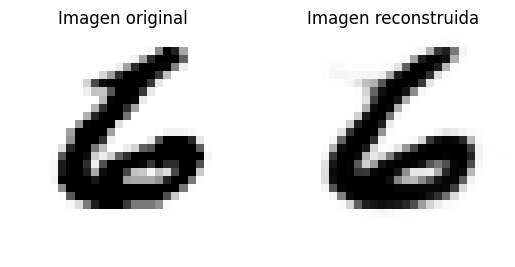

In [7]:
import matplotlib.pyplot as plt
import numpy
print("[INFO] making predictions...")
decoded = autoencoder.predict(testX)
outputs = None
# loop over our number of output samples
for i in range(0, len(testX)):
	# grab the original image and reconstructed image
	original = (testX[i] * 255).astype("uint8")
	recon = (decoded[i] * 255).astype("uint8")


plt.figure()
plt.subplot(1,2,1)
plt.imshow(numpy.squeeze(original, axis=-1), cmap=plt.get_cmap('gray_r'))
plt.axis('off')
plt.title('Imagen original')
plt.subplot(1,2,2)
plt.imshow(numpy.squeeze(recon, axis=-1), cmap=plt.get_cmap('gray_r'))
plt.axis('off')
plt.title('Imagen reconstruida')


Como habréis podido comprobar, nuestra red ha sido capaz de recontruir las imágenes de MNIST sin ningún tipo de problema!!!!


## 2.2 Eliminación de ruido##

Una vez que hemos aprendido a reconstruir imágenes a partir de un espacio latente de una dimensión muy reducida, ahora vamos a aplicar autoencoder a otra tarea esencial en computer vision, eliminación de ruido.

Los codificadores automáticos de eliminación de ruido son una extensión de los codificadores automáticos simples; sin embargo, vale la pena señalar que los codificadores automáticos de eliminación de ruido no estaban destinados originalmente a eliminar automáticamente el ruido de una imagen.


<center> <img src="https://i.ibb.co/G55Y63Y/autoencoder-denoising.png" alt="IA engloba ML, que a su vez engloba DL" border="0"> </center> </a>



In [8]:
# Importamos los paquetes necesarios
from tensorflow.keras.layers import BatchNormalization, Conv2D, Conv2DTranspose, LeakyReLU, Activation, Flatten, Dense, Reshape
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
import numpy as np

In [9]:
class ConvAutoencoder:
	@staticmethod
	def build(width, height, depth, filters=(32, 64), latentDim=16):
		# initialize the input shape to be "channels last" along with
		# the channels dimension itself
		# channels dimension itself
		inputShape = (height, width, depth)
		chanDim = -1

    # define the input to the encoder
		inputs = Input(shape=inputShape)
		x = inputs

		# loop over the number of filters
		for f in filters:
			# apply a CONV => RELU => BN operation
			x = Conv2D(f, (3, 3), strides=2, padding="same")(x)
			x = LeakyReLU(alpha=0.2)(x)
			x = BatchNormalization(axis=chanDim)(x)

		# flatten the network and then construct our latent vector
		volumeSize = K.int_shape(x)
		x = Flatten()(x)
		latent = Dense(latentDim)(x)

		# build the encoder model
		encoder = Model(inputs, latent, name="encoder")

  	# start building the decoder model which will accept the
		# output of the encoder as its inputs
		latentInputs = Input(shape=(latentDim,))
		x = Dense(np.prod(volumeSize[1:]))(latentInputs)
		x = Reshape((volumeSize[1], volumeSize[2], volumeSize[3]))(x)

		# loop over our number of filters again, but this time in
		# reverse order
		for f in filters[::-1]:
			# apply a CONV_TRANSPOSE => RELU => BN operation
			x = Conv2DTranspose(f, (3, 3), strides=2,
				padding="same")(x)
			x = LeakyReLU(alpha=0.2)(x)
			x = BatchNormalization(axis=chanDim)(x)
   	# apply a single CONV_TRANSPOSE layer used to recover the
		# original depth of the image
		x = Conv2DTranspose(depth, (3, 3), padding="same")(x)
		outputs = Activation("sigmoid")(x)

		# build the decoder model
		decoder = Model(latentInputs, outputs, name="decoder")

		# our autoencoder is the encoder + decoder
		autoencoder = Model(inputs, decoder(encoder(inputs)),
			name="autoencoder")
		# return a 3-tuple of the encoder, decoder, and autoencoder
		return (encoder, decoder, autoencoder)

In [10]:
# Cargamos la base de datos de MNIST y en este caso le añadimos ruido que luego trataremos de eliminar con nuestro modelo

print("[INFO] loading MNIST dataset...")
((trainX, _), (testX, _)) = mnist.load_data()

trainX = np.expand_dims(trainX, axis=-1)
testX = np.expand_dims(testX, axis=-1)
trainX = trainX.astype("float32") / 255.0
testX = testX.astype("float32") / 255.0

trainNoise = np.random.normal(loc=0.5, scale=0.5, size=trainX.shape)
testNoise = np.random.normal(loc=0.5, scale=0.5, size=testX.shape)
trainXNoisy = np.clip(trainX + trainNoise, 0, 1)
testXNoisy = np.clip(testX + testNoise, 0, 1)

[INFO] loading MNIST dataset...


In [13]:
print("[INFO] building autoencoder...")
(encoder, decoder, autoencoder) = ConvAutoencoder.build(width=28, height=28, depth=1, latentDim=32)
opt = Adam(1e-3)
autoencoder.compile(loss="mse", optimizer=opt)

# train the convolutional autoencoder
H = autoencoder.fit(
	trainXNoisy, trainX,
	validation_data=(testXNoisy, testX),
	epochs=EPOCHS,
	batch_size=BS,
	callbacks=[EarlyStopping(monitor='loss', patience=3, min_delta=0.0005)])

[INFO] building autoencoder...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 73s 5ms/step - loss: 0.0413 - val_loss: 0.0152
Epoch 2/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - loss: 0.0149 - val_loss: 0.0140
Epoch 3/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0140 - val_loss: 0.0139
Epoch 4/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0134 - val_loss: 0.0147
Epoch 5/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0130 - val_loss: 0.0139
Epoch 6/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0126 - val_loss: 0.0158
Epoch 7/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.0124 - val_loss: 0.0133
Epoch 8/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 0.0122 - val_loss: 0.0130
Epoch 9/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0121 - val_loss: 0.0139
Epoch 10/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.0119 - val_loss: 0.0127
Epoch 11/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 0.0118 - val_loss: 0.0153
Epoch 12/25
1875/1875 ━━

[INFO] making predictions...
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


Text(0.5, 1.0, 'Imagen reconstruida')

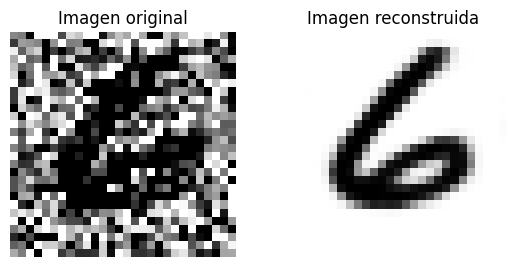

In [14]:
import matplotlib.pyplot as plt
import numpy
print("[INFO] making predictions...")
decoded = autoencoder.predict(testX)
outputs = None
# loop over our number of output samples
for i in range(0, len(testX)):
	# grab the original image and reconstructed image
	original = (testXNoisy[i] * 255).astype("uint8")
	recon = (decoded[i] * 255).astype("uint8")

plt.figure()
plt.subplot(1,2,1)
plt.imshow(numpy.squeeze(original, axis=-1), cmap=plt.get_cmap('gray_r'))
plt.axis('off')
plt.title('Imagen original')
plt.subplot(1,2,2)
plt.imshow(numpy.squeeze(recon, axis=-1), cmap=plt.get_cmap('gray_r'))
plt.axis('off')
plt.title('Imagen reconstruida')

## **3. Generative Adversarial Neural Network (GANs)**

Las GANs son un tipo muy especial de redes neuronales que se componen de 2 partes: un generador y un discriminador.

Con el siguiente esquema entenderéis mejor cómo funcionan:


<center><img src="https://cdn-images-1.medium.com/max/1600/1*N3nT9AXVnsFBta2R1eEMjg.png"></center>

Y aqui el esquema típico que veréis siempre:

<center><img src="https://cdn-images-1.medium.com/max/1600/1*N4oqJsGmH-KZg3Vqrm_uYw.jpeg"></center>



Y os preguntaréis, ¿en qué se diferencia un Autoencoder de una GAN?

Tanto las GANs como los autoencoders son modelos generativos. Sin embargo, un autoencoder esencialmente está aprendiendo una función de identidad mediante la compresión de los datos. Como ya hemos visto, el autoencoder comprimirá nuestros datos de entrada a un espacio latente de menor dimensión. Posteriormente, intentará reconstruir la entrada usando solo el vector del espacio latente.

Sin embargo, la GAN tiene las siguientes características:

* Acepta una entrada de baja dimensión.
* Construye un espacio de alta dimensión a partir de él.
* Genera el resultado final, que no forma parte de los datos de entrenamiento originales, pero idealmente pasa como tal.

A medida que se entrena una GAN, el modelo generativo genera imágenes "falsas" que luego se mezclan con imágenes "reales". El modelo discriminador debe determinar qué imágenes son "reales" frente a "falsas/generadas".

A medida que el modelo generativo se vuelve cada vez mejor en la generación de imágenes falsas que pueden engañar al discriminador, el término de pérdidas evoluciona y cambia (esta es una de las razones por las que entrenar GAN es tan difícil).

Los autoencoders no pueden generar nuevos datos realistas que los humanos podrían considerar "pasables". Por ello, para la síntesis de nuevos datos, vuestros mejores amigos serán las GANs. A continuación, vamos a desarrollar un ejemplo de síntesis de imágenes:

In [15]:
'''
DCGAN on MNIST using Keras
Author: Rowel Atienza
Project: https://github.com/roatienza/Deep-Learning-Experiments
Usage: python3 dcgan_mnist.py
'''

import numpy as np
import time
# tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Reshape
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, UpSampling2D
from tensorflow.keras.layers import LeakyReLU, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam, RMSprop

import matplotlib.pyplot as plt

class ElapsedTimer(object):
    def __init__(self):
        self.start_time = time.time()
    def elapsed(self,sec):
        if sec < 60:
            return str(sec) + " sec"
        elif sec < (60 * 60):
            return str(sec / 60) + " min"
        else:
            return str(sec / (60 * 60)) + " hr"
    def elapsed_time(self):
        print("Elapsed: %s " % self.elapsed(time.time() - self.start_time) )

class DCGAN(object):
    def __init__(self, img_rows=28, img_cols=28, channel=1):

        self.img_rows = img_rows
        self.img_cols = img_cols
        self.channel = channel
        self.D = None   # discriminator
        self.G = None   # generator
        self.AM = None  # adversarial model
        self.DM = None  # discriminator model

    # (W−F+2P)/S+1
    def discriminator(self):
        if self.D:
            return self.D
        self.D = Sequential()
        depth = 64
        dropout = 0.4
        # In: 28 x 28 x 1, depth = 1
        # Out: 14 x 14 x 1, depth=64
        input_shape = (self.img_rows, self.img_cols, self.channel)
        self.D.add(Conv2D(depth*1, 5, strides=2, input_shape=input_shape,\
            padding='same'))
        self.D.add(LeakyReLU(alpha=0.2))
        self.D.add(Dropout(dropout))

        self.D.add(Conv2D(depth*2, 5, strides=2, padding='same'))
        self.D.add(LeakyReLU(alpha=0.2))
        self.D.add(Dropout(dropout))

        self.D.add(Conv2D(depth*4, 5, strides=2, padding='same'))
        self.D.add(LeakyReLU(alpha=0.2))
        self.D.add(Dropout(dropout))

        self.D.add(Conv2D(depth*8, 5, strides=1, padding='same'))
        self.D.add(LeakyReLU(alpha=0.2))
        self.D.add(Dropout(dropout))

        # Out: 1-dim probability
        self.D.add(Flatten())
        self.D.add(Dense(1))
        self.D.add(Activation('sigmoid'))
        self.D.summary()
        return self.D

    def generator(self):
        if self.G:
            return self.G
        self.G = Sequential()
        dropout = 0.4
        depth = 64+64+64+64
        dim = 7
        # In: 100
        # Out: dim x dim x depth
        self.G.add(Dense(dim*dim*depth, input_dim=100))
        self.G.add(BatchNormalization(momentum=0.9))
        self.G.add(Activation('relu'))
        self.G.add(Reshape((dim, dim, depth)))
        self.G.add(Dropout(dropout))

        # In: dim x dim x depth
        # Out: 2*dim x 2*dim x depth/2
        self.G.add(UpSampling2D())
        self.G.add(Conv2DTranspose(int(depth/2), 5, padding='same'))
        self.G.add(BatchNormalization(momentum=0.9))
        self.G.add(Activation('relu'))

        self.G.add(UpSampling2D())
        self.G.add(Conv2DTranspose(int(depth/4), 5, padding='same'))
        self.G.add(BatchNormalization(momentum=0.9))
        self.G.add(Activation('relu'))

        self.G.add(Conv2DTranspose(int(depth/8), 5, padding='same'))
        self.G.add(BatchNormalization(momentum=0.9))
        self.G.add(Activation('relu'))

        # Out: 28 x 28 x 1 grayscale image [0.0,1.0] per pix
        self.G.add(Conv2DTranspose(1, 5, padding='same'))
        self.G.add(Activation('sigmoid'))
        self.G.summary()
        return self.G

    def discriminator_model(self):
        if self.DM:
            return self.DM
        optimizer = RMSprop(0.002)
        self.DM = Sequential()
        self.DM.add(self.discriminator())
        self.DM.compile(loss='binary_crossentropy', optimizer=optimizer,\
            metrics=['accuracy'])
        return self.DM

    def adversarial_model(self):
        if self.AM:
            return self.AM
        optimizer = RMSprop(0.001)
        self.AM = Sequential()
        self.AM.add(self.generator())
        self.AM.add(self.discriminator())
        self.AM.compile(loss='binary_crossentropy', optimizer=optimizer,\
            metrics=['accuracy'])
        return self.AM

class MNIST_DCGAN(object):
    def __init__(self):
        self.img_rows = 28
        self.img_cols = 28
        self.channel = 1

        #self.x_train = input_data.read_data_sets("mnist",\
        	#one_hot=True).train.images
        (self.x_train, _), (_, _) = tf.keras.datasets.mnist.load_data()
        self.x_train = self.x_train.reshape(-1, self.img_rows,\
        	self.img_cols, 1).astype(np.float32)

        self.DCGAN = DCGAN()
        self.discriminator =  self.DCGAN.discriminator_model()
        self.adversarial = self.DCGAN.adversarial_model()
        self.generator = self.DCGAN.generator()

    def train(self, train_steps=2000, batch_size=256, save_interval=0):
        noise_input = None
        if save_interval>0:
            noise_input = np.random.uniform(-1.0, 1.0, size=[16, 100])
        for i in range(train_steps):
            images_train = self.x_train[np.random.randint(0,
                self.x_train.shape[0], size=batch_size), :, :, :]
            noise = np.random.uniform(-1.0, 1.0, size=[batch_size, 100])
            images_fake = self.generator.predict(noise)
            x = np.concatenate((images_train, images_fake))
            y = np.ones([2*batch_size, 1])
            y[batch_size:, :] = 0
            d_loss = self.discriminator.train_on_batch(x, y)

            y = np.ones([batch_size, 1])
            noise = np.random.uniform(-1.0, 1.0, size=[batch_size, 100])
            a_loss = self.adversarial.train_on_batch(noise, y)
            log_mesg = "%d: [D loss: %f, acc: %f]" % (i, d_loss[0], d_loss[1])
            log_mesg = "%s  [A loss: %f, acc: %f]" % (log_mesg, a_loss[0], a_loss[1])
            print(log_mesg)
            if save_interval>0:
                if (i+1)%save_interval==0:
                    self.plot_images(save2file=True, samples=noise_input.shape[0],\
                        noise=noise_input, step=(i+1))

    def plot_images(self, save2file=False, fake=True, samples=16, noise=None, step=0):
        filename = 'mnist.png'
        if fake:
            if noise is None:
                noise = np.random.uniform(-1.0, 1.0, size=[samples, 100])
            else:
                filename = "mnist_%d.png" % step
            images = self.generator.predict(noise)
        else:
            i = np.random.randint(0, self.x_train.shape[0], samples)
            images = self.x_train[i, :, :, :]

        plt.figure(figsize=(10,10))
        for i in range(images.shape[0]):
            plt.subplot(4, 4, i+1)
            image = images[i, :, :, :]
            image = np.reshape(image, [self.img_rows, self.img_cols])
            plt.imshow(image, cmap='gray')
            plt.axis('off')
        plt.tight_layout()
        if save2file:
            plt.savefig(filename)
            plt.close('all')
        else:
            plt.show()

In [ ]:
mnist_dcgan = MNIST_DCGAN()
timer = ElapsedTimer()
mnist_dcgan.train(train_steps=2000, batch_size=256, save_interval=1000)
timer.elapsed_time()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)                   │ (None, 14, 14, 64)          │           1,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_24 (LeakyReLU)           │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 7, 7, 128)           │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_25 (LeakyReLU)           │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 4, 4, 256)           │         819,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_26 (LeakyReLU)           │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 4, 4, 512)           │       3,277,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_27 (LeakyReLU)           │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 1)                   │           8,193 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_11 (Activation)           │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,311,553 (16.45 MB)

 Trainable params: 4,311,553 (16.45 MB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                     │ (None, 12544)               │       1,266,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_24               │ (None, 12544)               │          50,176 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_12 (Activation)           │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_6 (Reshape)                  │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_2 (UpSampling2D)       │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_19                  │ (None, 14, 14, 128)         │         819,328 │
│ (Conv2DTranspose)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_25               │ (None, 14, 14, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_13 (Activation)           │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_3 (UpSampling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_20                  │ (None, 28, 28, 64)          │         204,864 │
│ (Conv2DTranspose)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_26               │ (None, 28, 28, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_14 (Activation)           │ (None, 28, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_21                  │ (None, 28, 28, 32)          │          51,232 │
│ (Conv2DTranspose)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_27               │ (None, 28, 28, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_15 (Activation)           │ (None, 28, 28, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_22                  │ (None, 28, 28, 1)           │             801 │
│ (Conv2DTranspose)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 2,394,241 (9.13 MB)

 Trainable params: 2,368,705 (9.04 MB)

 Non-trainable params: 25,536 (99.75 KB)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step  


In [ ]:
mnist_dcgan.plot_images(fake=True)

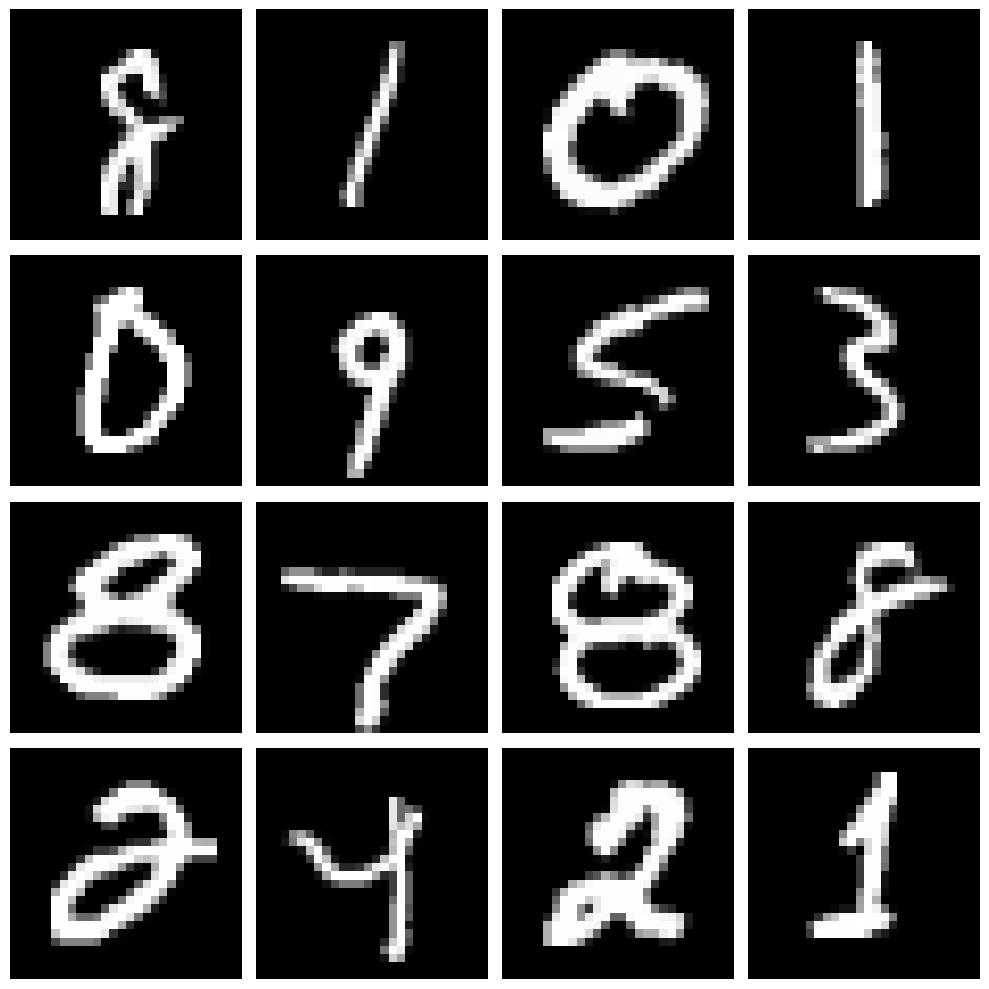

In [18]:
mnist_dcgan.plot_images(fake=False)

Como podemos ver, la convergencia de una GAN es un proceso lento, donde la elección de hiperparámetros juega un papel crítico. Es por eso, junto a la dificultad para ajustar el proceso de generación de manera manual a contener atributos en concreto de interés (pensemos en la creación de imágenes vía prompt), que las GAN están siendo poco a poco sustituidas por otro tipo de modelos generativos.